In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load GoEmotions dataset from Hugging Face
from datasets import load_dataset

print("Loading GoEmotions dataset from Hugging Face...")
dataset = load_dataset('google-research-datasets/go_emotions', 'simplified')

Loading GoEmotions dataset from Hugging Face...


Generating test split: 100%|██████████| 5427/5427 [00:00<00:00, 710683.69 examples/s]


In [3]:
# Combine train, validation, and test sets
df_train = pd.DataFrame(dataset['train'])
df_val = pd.DataFrame(dataset['validation'])
df_test = pd.DataFrame(dataset['test'])
df = pd.concat([df_train, df_val, df_test], ignore_index=True)

In [4]:
print(f"Dataset loaded: {len(df_train)} train + {len(df_val)} val + {len(df_test)} test = {len(df)} total")

Dataset loaded: 43410 train + 5426 val + 5427 test = 54263 total


In [5]:
# GoEmotions emotion labels (28 emotions in simplified version)
EMOTIONS = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]


In [6]:
#The Hugging Face dataset has 'labels' column with emotion indices
print("=" * 80)
print("GoEmotions Dataset - Exploratory Data Analysis")
print("=" * 80)

# Basic dataset information
print(f"\n1. DATASET OVERVIEW")
print(f"   Total samples: {len(df)}")
print(f"   Columns: {df.columns.tolist()}")
print(f"   Shape: {df.shape}")

GoEmotions Dataset - Exploratory Data Analysis

1. DATASET OVERVIEW
   Total samples: 54263
   Columns: ['text', 'labels', 'id']
   Shape: (54263, 3)


In [7]:
# Text statistics
df['text_length'] = df['text'].str.len()
df['word_count'] = df['text'].str.split().str.len()

print(f"\n2. TEXT STATISTICS")
print(f"   Average text length: {df['text_length'].mean():.2f} characters")
print(f"   Average word count: {df['word_count'].mean():.2f} words")
print(f"   Min text length: {df['text_length'].min()}")
print(f"   Max text length: {df['text_length'].max()}")



2. TEXT STATISTICS
   Average text length: 68.33 characters
   Average word count: 12.82 words
   Min text length: 2
   Max text length: 703


In [8]:
# Parse emotion labels (they're already in list format from Hugging Face)
df['emotion_list'] = df['labels']
df['num_emotions'] = df['emotion_list'].apply(len)

print(f"\n3. EMOTION STATISTICS")
print(f"   Average emotions per text: {df['num_emotions'].mean():.2f}")
print(f"   Max emotions in a text: {df['num_emotions'].max()}")



3. EMOTION STATISTICS
   Average emotions per text: 1.18
   Max emotions in a text: 5


In [9]:
# Count emotion frequencies
all_emotions = [e for sublist in df['emotion_list'] for e in sublist]
emotion_counts = Counter(all_emotions)
emotion_freq = {EMOTIONS[k]: v for k, v in emotion_counts.items()}

print(f"\n4. TOP 10 MOST FREQUENT EMOTIONS")
for emotion, count in sorted(emotion_freq.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"   {emotion}: {count} ({count/len(df)*100:.2f}%)")


4. TOP 10 MOST FREQUENT EMOTIONS
   neutral: 17772 (32.75%)
   admiration: 5122 (9.44%)
   approval: 3687 (6.79%)
   gratitude: 3372 (6.21%)
   annoyance: 3093 (5.70%)
   amusement: 2895 (5.34%)
   curiosity: 2723 (5.02%)
   disapproval: 2581 (4.76%)
   love: 2576 (4.75%)
   optimism: 1976 (3.64%)


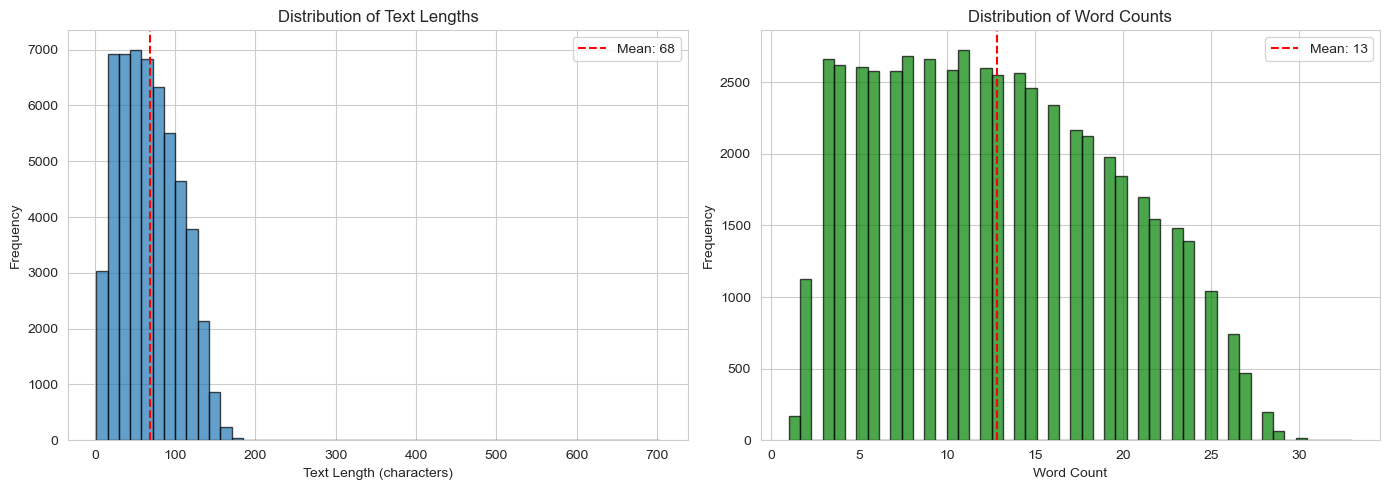

In [ ]:
# 1. Distribution of text lengths
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.hist(df['text_length'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Text Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Text Lengths')
plt.axvline(df['text_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["text_length"].mean():.0f}')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(df['word_count'], bins=50, edgecolor='black', alpha=0.7, color='green')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.title('Distribution of Word Counts')
plt.axvline(df['word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df["word_count"].mean():.0f}')
plt.legend()
plt.tight_layout()
#plt.savefig('text_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

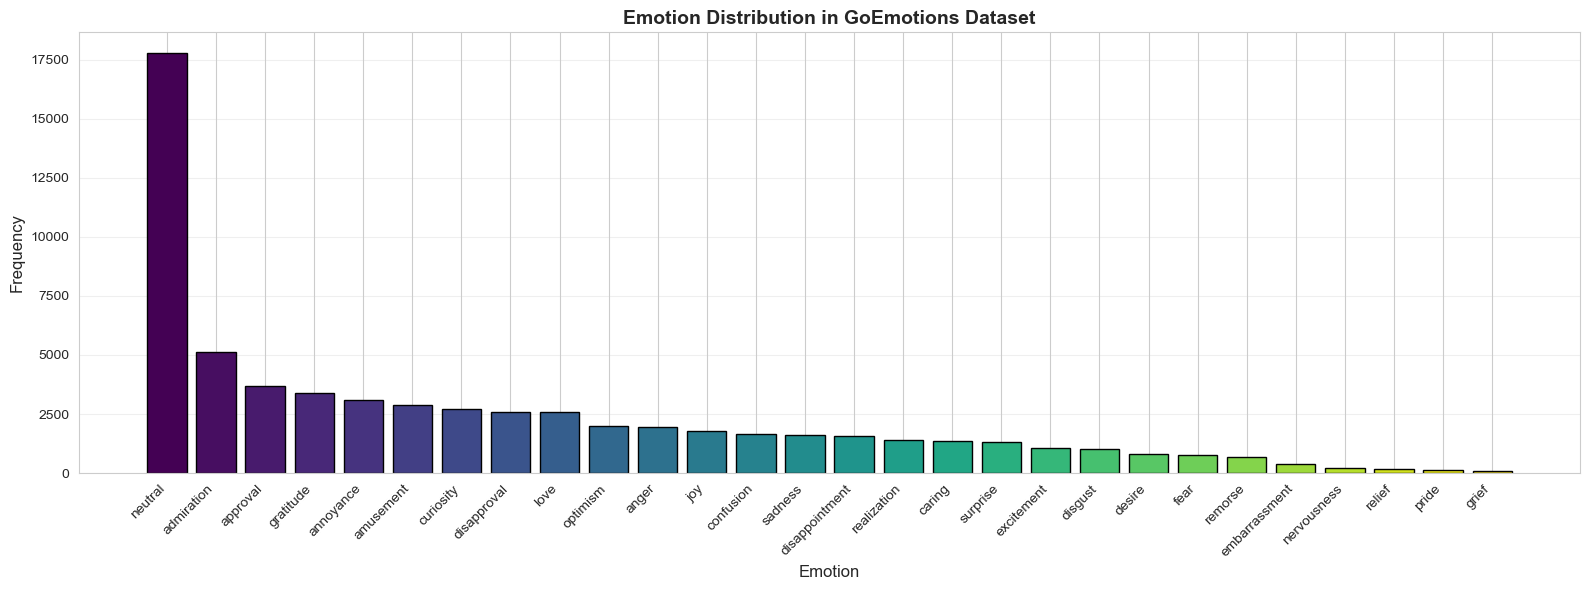

In [ ]:
# 2. Emotion frequency bar plot
plt.figure(figsize=(16, 6))
emotions_sorted = sorted(emotion_freq.items(), key=lambda x: x[1], reverse=True)
emotions_names = [e[0] for e in emotions_sorted]
emotions_values = [e[1] for e in emotions_sorted]

colors = plt.cm.viridis(np.linspace(0, 1, len(emotions_names)))
plt.bar(emotions_names, emotions_values, color=colors, edgecolor='black')
plt.xlabel('Emotion', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Emotion Distribution in GoEmotions Dataset', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
#plt.savefig('emotion_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

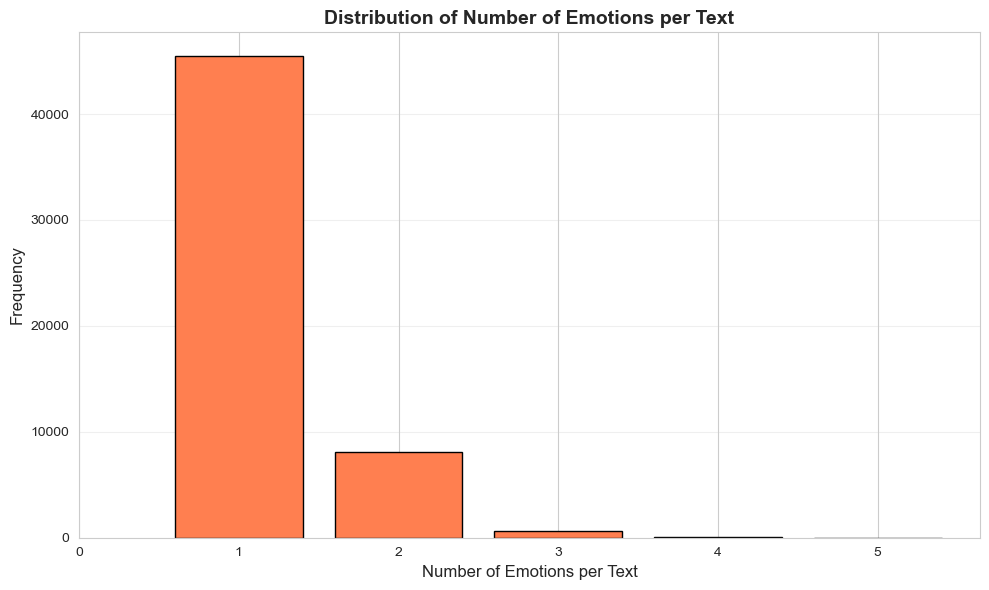

In [ ]:
# 3. Number of emotions per text
plt.figure(figsize=(10, 6))
emotion_counts_dist = df['num_emotions'].value_counts().sort_index()
plt.bar(emotion_counts_dist.index, emotion_counts_dist.values, color='coral', edgecolor='black')
plt.xlabel('Number of Emotions per Text', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Number of Emotions per Text', fontsize=14, fontweight='bold')
plt.xticks(range(int(df['num_emotions'].max()) + 1))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
#plt.savefig('emotions_per_text.png', dpi=300, bbox_inches='tight')
plt.show()


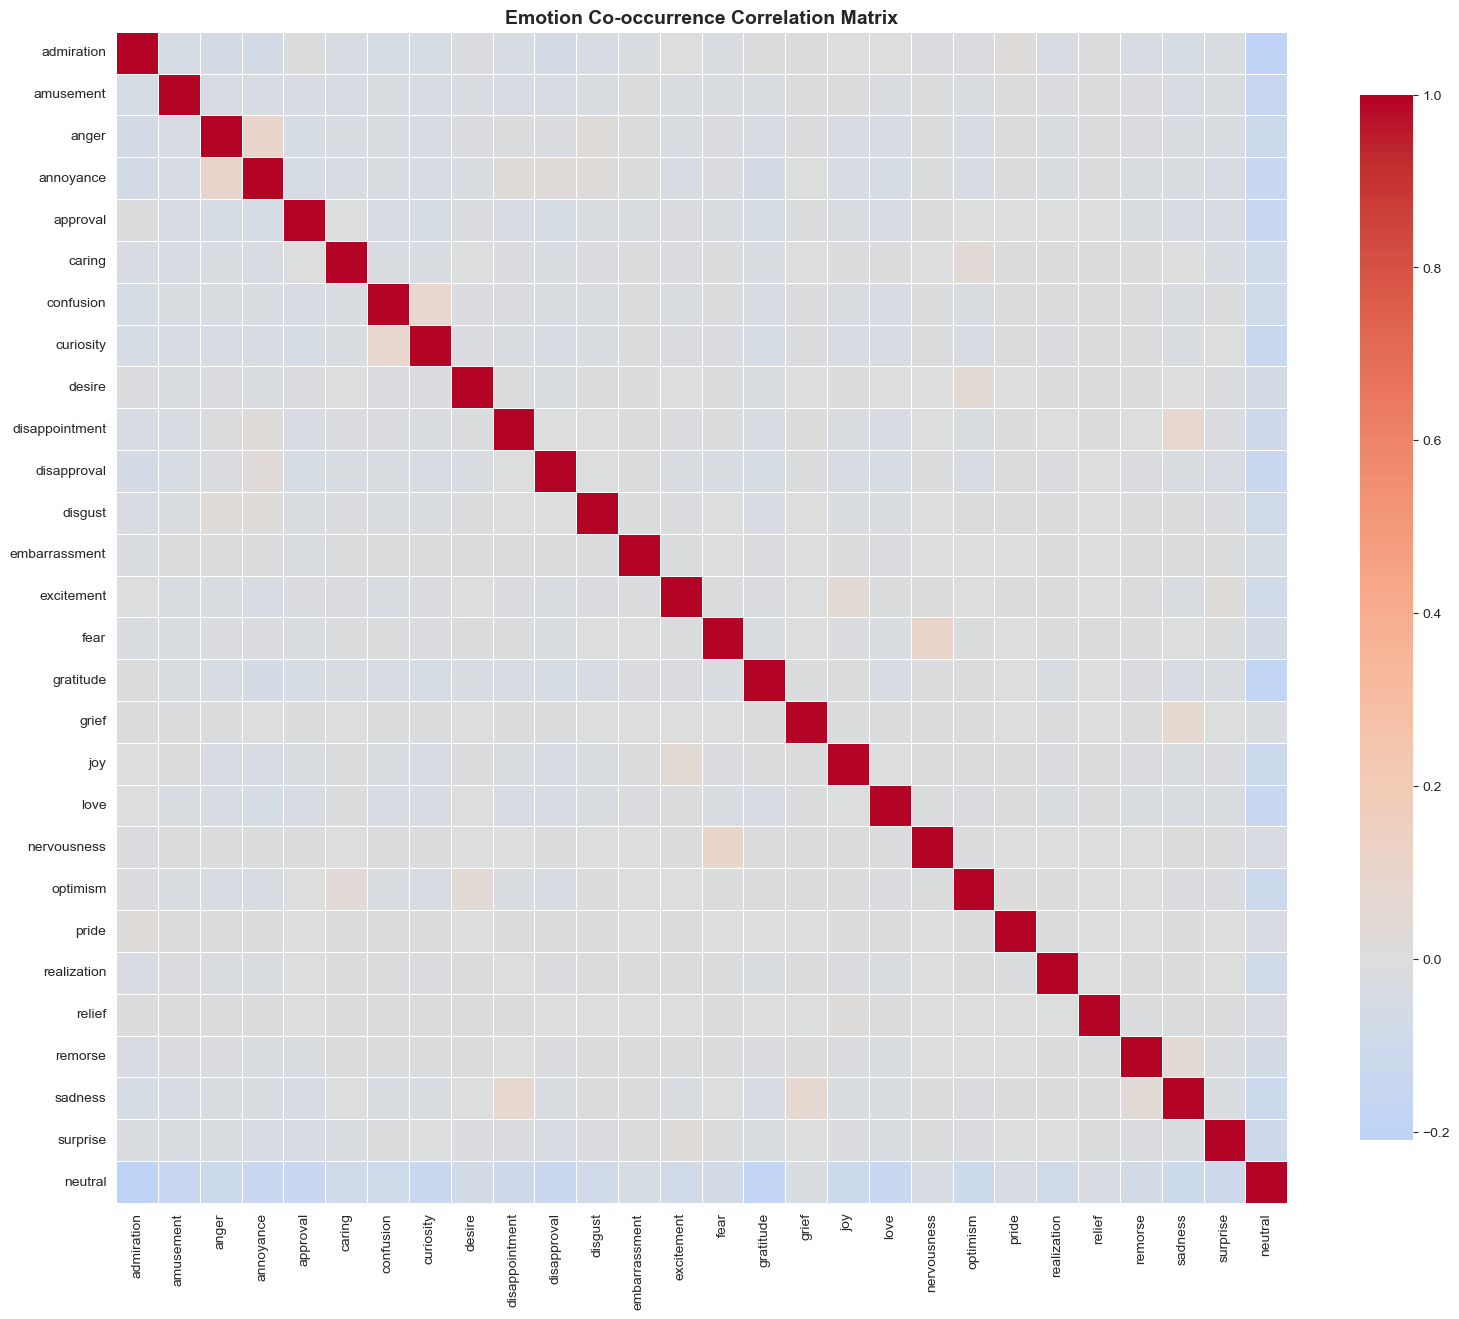

In [ ]:
# 4. Emotion correlation heatmap
emotion_matrix = np.zeros((len(df), len(EMOTIONS)))
for idx, emotions in enumerate(df['emotion_list']):
    for e in emotions:
        emotion_matrix[idx, e] = 1

emotion_df = pd.DataFrame(emotion_matrix, columns=EMOTIONS)
correlation_matrix = emotion_df.corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Emotion Co-occurrence Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('emotion_correlation.png', dpi=300, bbox_inches='tight')
plt.show()

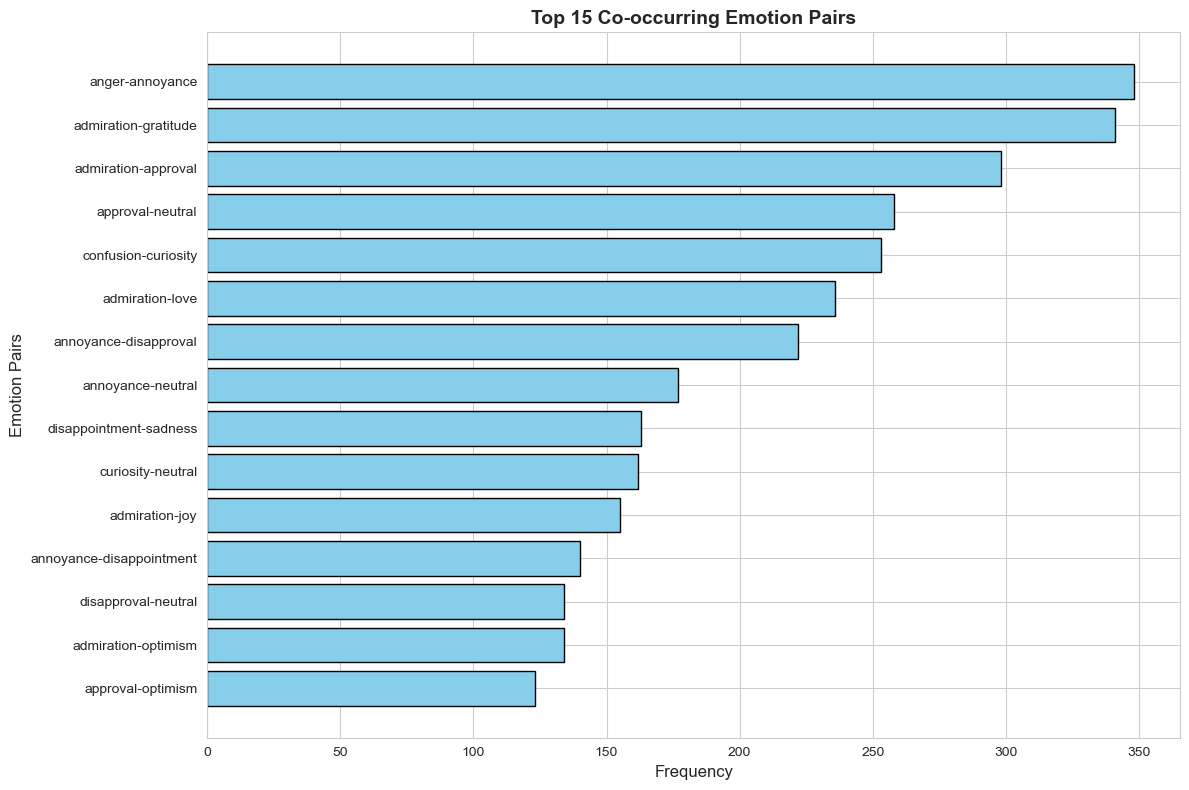

In [ ]:
# 5. Top emotion pairs
from itertools import combinations
emotion_pairs = []
for emotions in df['emotion_list']:
    if len(emotions) > 1:
        for pair in combinations(sorted(emotions), 2):
            emotion_pairs.append((EMOTIONS[pair[0]], EMOTIONS[pair[1]]))

pair_counts = Counter(emotion_pairs)
top_pairs = pair_counts.most_common(15)

plt.figure(figsize=(12, 8))
pair_labels = [f"{p[0][0]}-{p[0][1]}" for p in top_pairs]
pair_values = [p[1] for p in top_pairs]
plt.barh(pair_labels, pair_values, color='skyblue', edgecolor='black')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Emotion Pairs', fontsize=12)
plt.title('Top 15 Co-occurring Emotion Pairs', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.tight_layout()
#plt.savefig('top_emotion_pairs.png', dpi=300, bbox_inches='tight')
plt.show()

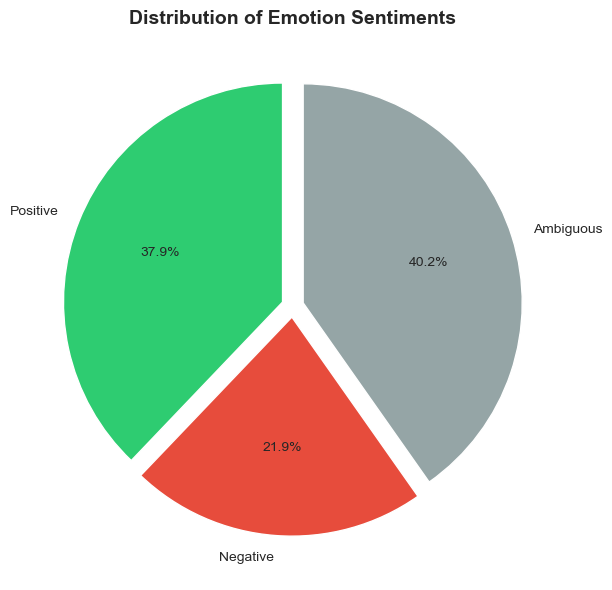


EDA Complete! Visualizations saved as PNG files.


In [ ]:
# 6. Emotion group analysis (sentiment groups)
positive_emotions = ['admiration', 'amusement', 'approval', 'caring', 'excitement',
                     'gratitude', 'joy', 'love', 'optimism', 'pride', 'relief']
negative_emotions = ['anger', 'annoyance', 'disappointment', 'disapproval', 'disgust',
                     'embarrassment', 'fear', 'grief', 'nervousness', 'remorse', 'sadness']
ambiguous_emotions = ['confusion', 'curiosity', 'desire', 'realization', 'surprise', 'neutral']

def categorize_sentiment(emotions):
    pos = sum(1 for e in emotions if EMOTIONS[e] in positive_emotions)
    neg = sum(1 for e in emotions if EMOTIONS[e] in negative_emotions)
    amb = sum(1 for e in emotions if EMOTIONS[e] in ambiguous_emotions)
    return pos, neg, amb

df['pos_count'], df['neg_count'], df['amb_count'] = zip(*df['emotion_list'].apply(categorize_sentiment))

sentiment_totals = {
    'Positive': df['pos_count'].sum(),
    'Negative': df['neg_count'].sum(),
    'Ambiguous': df['amb_count'].sum()
}

plt.figure(figsize=(10, 6))
colors_sentiment = ['#2ecc71', '#e74c3c', '#95a5a6']
plt.pie(sentiment_totals.values(), labels=sentiment_totals.keys(), autopct='%1.1f%%',
        startangle=90, colors=colors_sentiment, explode=(0.05, 0.05, 0.05))
plt.title('Distribution of Emotion Sentiments', fontsize=14, fontweight='bold')
plt.tight_layout()
#plt.savefig('sentiment_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "=" * 80)
#print("EDA Complete! Visualizations saved as PNG files.")
print("=" * 80)